<h1>Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
warnings.filterwarnings('ignore')

In [21]:
ds = pd.read_csv('aerofit_treadmill.csv')

<h1>Exploratory Data Analysis.

In [3]:
ds.shape
#dimension of dataset

(180, 9)

In [4]:
ds.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [5]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [6]:
ds.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [7]:
ds.duplicated().sum()

np.int64(0)

No Null and No Duplicate values

In [8]:
ds.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


<h4>
1. Age - The age range of customers spans from 18 to 50 year, with an average age of 29 years.

2. Education - Customer education levels vary between 12 and 21 years, with an average education duration of 16 years.

3. Usage - Customers intend to utilize the product anywhere from 2 to 7 times per week, with an average usage frequency of 3 times per week.

4. Fitness - On average, customers have rated their fitness at 3 on a 5-point scale, reflecting a moderate level of fitness.

5. Income - The annual income of customers falls within the range of 30,000 to 100,000, with an average income of approximately 54,000.

6. Miles - Customers weekly running goals range from 21 to 360 miles, with an average target of 103 miles per week.

In [10]:
ds.describe(include=['object'])

,Product,Gender,MaritalStatus
count,180,180,180
unique,3,2,2
top,KP281,Male,Partnered
freq,80,104,107


<h4>
1. Product - the KP281 product demonstrated the highest sales performance among the three products, accounting for approximately 44% (freq/count*100) of total sales.

2. Gender - Based on the data, around 58% of the buyers were Male and 42% were female.

3. Marital Status - Based on the data, around 60% of the buyers were Married and 40% were single.

In [11]:
# checking the unique values for columns
for i in ds.columns:
    print('Unique Values in',i,'column are :')
    print(ds[i].unique())

Unique Values in Product column are :
['KP281' 'KP481' 'KP781']
Unique Values in Age column are :
[18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41
 43 44 46 47 50 45 48 42]
Unique Values in Gender column are :
['Male' 'Female']
Unique Values in Education column are :
[14 15 12 13 16 18 20 21]
Unique Values in MaritalStatus column are :
['Single' 'Partnered']
Unique Values in Usage column are :
[3 2 4 5 6 7]
Unique Values in Fitness column are :
[4 3 2 1 5]
Unique Values in Income column are :
[ 29562  31836  30699  32973  35247  37521  36384  38658  40932  34110
  39795  42069  44343  45480  46617  48891  53439  43206  52302  51165
  50028  54576  68220  55713  60261  67083  56850  59124  61398  57987
  64809  47754  65220  62535  48658  54781  48556  58516  53536  61006
  57271  52291  49801  62251  64741  70966  75946  74701  69721  83416
  88396  90886  92131  77191  52290  85906 103336  99601  89641  95866
 104581  95508]
Unique Values in Miles column are :


In [12]:
ds['Product'].value_counts()

Product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

In [13]:
KP281 = ds.loc[ds['Product'] == 'KP281']
KP481 = ds.loc[ds['Product'] == 'KP481'] 
KP781 = ds.loc[ds['Product'] == 'KP781'] 

In [14]:
ds['Gender'].value_counts()

Gender
Male      104
Female     76
Name: count, dtype: int64

In [20]:
Male = ds.loc[ds['Gender'] == 'Male']
Female = ds.loc[ds['Gender'] == 'Female']

In [15]:
ds['Education'].value_counts()

Education
16    85
14    55
18    23
15     5
13     5
12     3
21     3
20     1
Name: count, dtype: int64

In [16]:
ds['MaritalStatus'].value_counts()

MaritalStatus
Partnered    107
Single        73
Name: count, dtype: int64

In [24]:
Partnered = ds.loc[ds['MaritalStatus'] == 'Partnered']
Singal = ds.loc[ds['MaritalStatus'] == 'Single']

In [17]:
ds['Usage'].value_counts()

Usage
3    69
4    52
2    33
5    17
6     7
7     2
Name: count, dtype: int64

In [18]:
ds['Fitness'].value_counts()

Fitness
3    97
5    31
2    26
4    24
1     2
Name: count, dtype: int64

<h2>Measure of Central Tendency.

In [35]:
#'Income'
imean = ds['Income'].mean()
print(f'Mean of Income:{imean:.2f}')

Mean of Income:53719.58


In [23]:
imedian = ds['Income'].median()
print(f'Median of Income:{imedian:.2f}')

Median of Income:50596.50


In [26]:
imode = ds['Income'].mode()
print(imode)

0    45480
Name: Income, dtype: int64


<h4>We can see Mean>Median>Mode. So, the distribution of 'Income' is positively skewed.
you can see it in below distribution plot(cell).

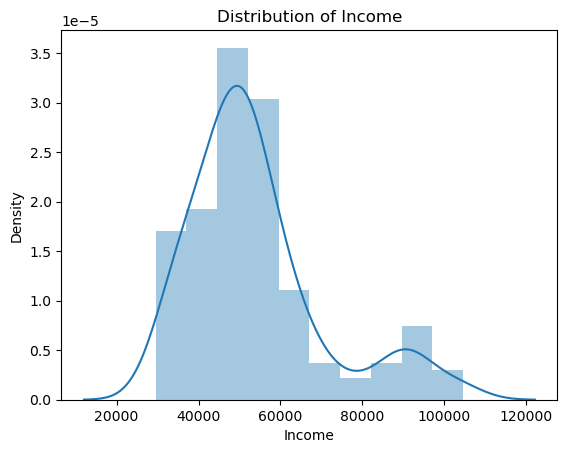

In [45]:
#Ploting Distribution Graph of Income.
dsi = ds['Income']
sns.distplot(dsi, bins=10, hist=True, kde=True, label = 'Income')
plt.title('Distribution of Income')
plt.show()

<h2>Measure of Despersion.

In [52]:
#Income
imin = ds['Income'].min()
print('Minimum Income:',imin)

Minimum Income: 29562


In [53]:
imax = ds['Income'].max()
print('Maximum Income:',imax)

Maximum Income: 104581


In [54]:
irange = imax - imin
print('Range of Income:',irange)

Range of Income: 75019


In [57]:
ivar = ds['Income'].var()
print('Variance Income:',ivar)

Variance Income: 272470624.1447548


In [55]:
istd = ds['Income'].std()
print('Standard Deviation of Income:',istd)

Standard Deviation of Income: 16506.68422623862


In [59]:
Q1 = ds['Income'].quantile(0.25)
Q2 = ds['Income'].quantile(0.5)
Q3 = ds['Income'].quantile(0.75)
IQR = Q3 - Q1
print('Quartile 1:',Q1)
print('Quartile 2:',Q2)
print('Quartile 3:',Q3)
print('The InterQuartile Range is:',IQR)

Quartile 1: 44058.75
Quartile 2: 50596.5
Quartile 3: 58668.0
The InterQuartile Range is: 14609.25


<h2>Visual Analysis.

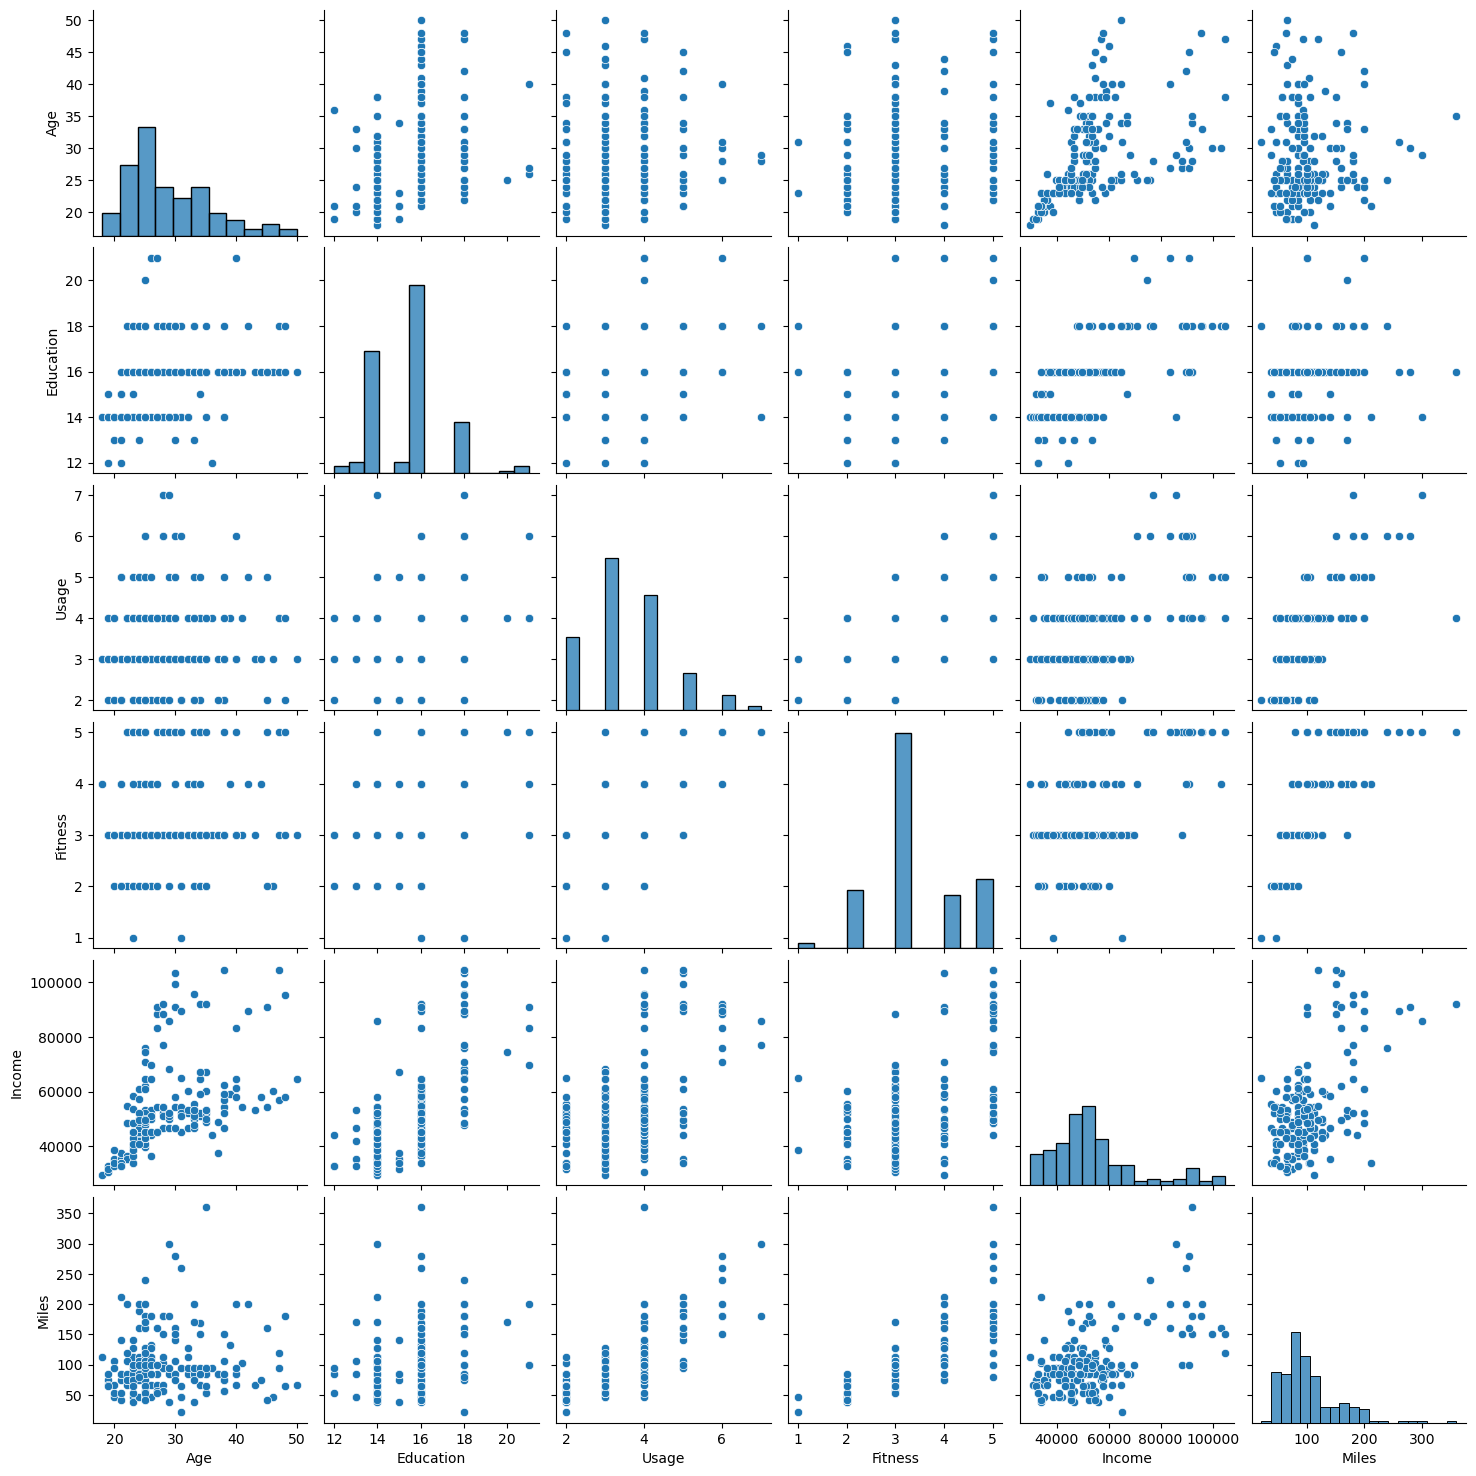

In [94]:
sns.pairplot(ds)
plt.show()

In [9]:
corr_ds = ds.copy()

In [11]:
#label Encoding the data
object_cols = corr_ds.select_dtypes(include='object').columns

for col in object_cols:
    le = LabelEncoder()
    corr_ds[col] = le.fit_transform(corr_ds[col])

In [12]:
ds_cor = corr_ds.corr()

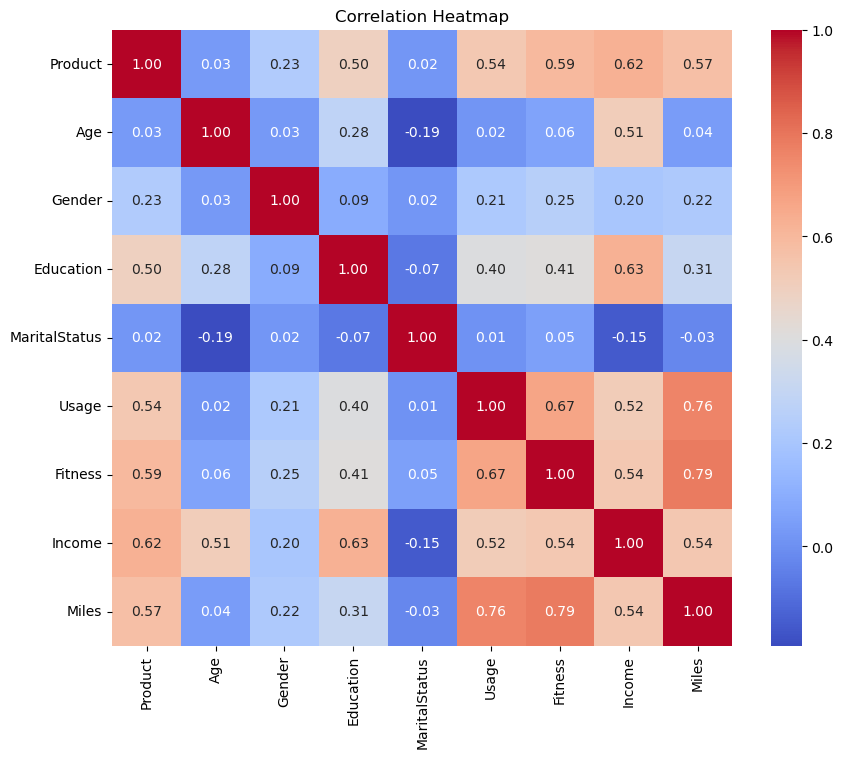

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(ds_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h4>Observations

We can see the correlation between them.

From the pair plot we can see Age and Income are positively correlated and heatmap also suggests a strong correlation betwwen them.

Eductaion and Income are highly correlated as its obvious. Eductation also has significatnt correlation between Fitness rating and Usage of the treadmill.

Usage is highly correlated with Fitness and Miles as more the usage more the fitness and mileage.

<h2>Univariate Analysis

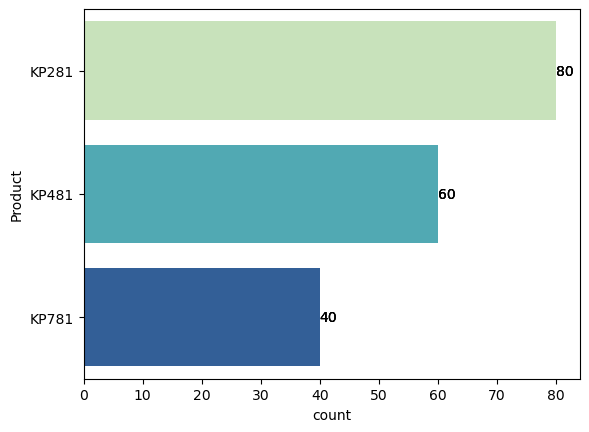

In [40]:
ax = sns.countplot(data=ds, y='Product', palette='YlGnBu')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

<h4>Observations

KP281 is the most purchased product having the count of 80.
    
KP481 is the second most purchased product having the count of 60.

Lastly KP781 is the purchased product having the count of 40.

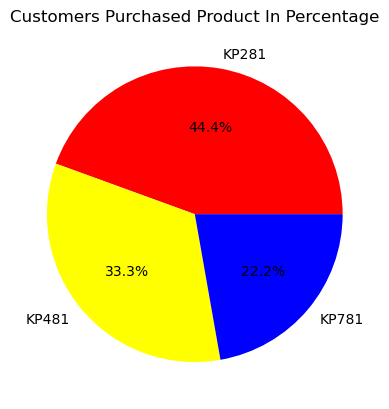

In [23]:
pro = ds.Product.value_counts()
plt.pie(pro, labels=pro.index, autopct='%1.1f%%', colors = ['red', 'yellow','blue'])
plt.title('Customers Purchased Product In Percentage')
plt.show()

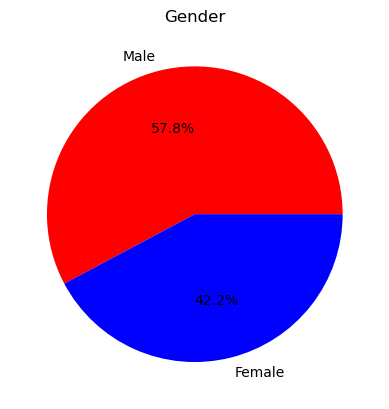

In [50]:
Gen = ds.Gender.value_counts()
plt.pie(Gen, labels=Gen.index, autopct='%1.1f%%', colors = ['red', 'blue'])
plt.title('Gender')
plt.show()

<h4>Observations

Males are 15.6% higher than females

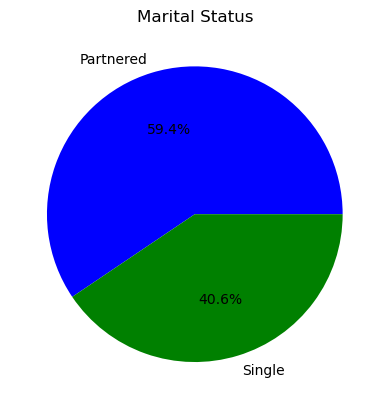

In [51]:
ms = ds.MaritalStatus.value_counts()
plt.pie(ms, labels=ms.index, autopct='%1.1f%%', colors = ['blue', 'green'])
plt.title('Marital Status')
plt.show()

<h4>Observations

Couples are the most frequent buyers of the treadmill with approx 59%.

Singles are the 2nd most frequent buyers of the treadmill with approx 41%.

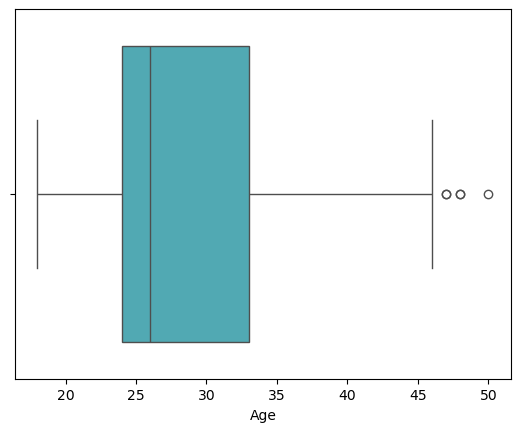

In [42]:
sns.boxplot(data=ds, x='Age', palette='YlGnBu')
plt.show()

<h4>Observations

In [46]:
#Outlier found in age.
q1 = ds['Age'].quantile(0.25)
q2 = ds['Age'].quantile(0.75)
iqr = q2 - q1
print('The IQR of age is:',iqr)

The IQR of age is: 9.0


Most common age range is roughly between 22 - 32.

There are few data points whose age is more than 46 years (Outlier).

Difference between 25th and 75th percentile is 9 years.

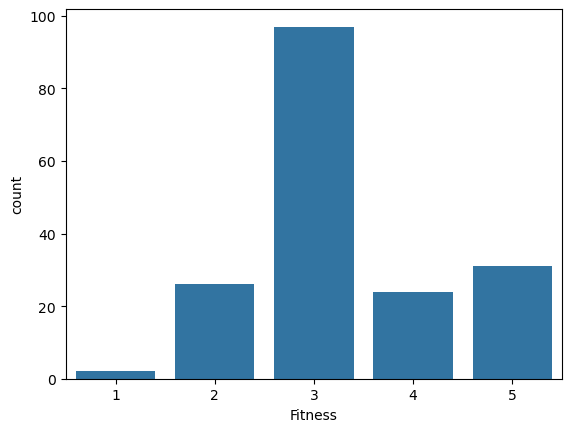

In [49]:
#fitness
sns.countplot(data=ds, x="Fitness")
plt.show()

<h4>Observations

Customers who purchased treadmills are moderately fit (Rating - 3).

Distribution of customers rating of 2 & 4 are roughly same.
    
Value count of customers of fitness rating 5 is slightly more than 2 and 4.

<h2>Bivariate Analysis

In [64]:
#Average Income of customer buying each model
ds.groupby('Product')['Income'].mean()

Product
KP281    46418.025
KP481    48973.650
KP781    75441.575
Name: Income, dtype: float64

In [65]:
#Average Age of customer buying each model
ds.groupby('Product')['Age'].mean()

Product
KP281    28.55
KP481    28.90
KP781    29.10
Name: Age, dtype: float64

In [66]:
#Average Fitness of customer buying each model
ds.groupby('Product')['Fitness'].mean()

Product
KP281    2.9625
KP481    2.9000
KP781    4.6250
Name: Fitness, dtype: float64

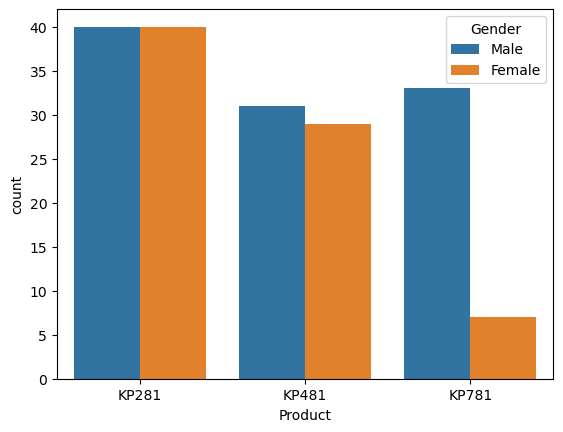

In [70]:
# Gender & Product
sns.countplot(data=ds, x='Product', hue='Gender')
plt.show()

<h4>Observations

For model KP281 user of both Gender are same.
    
Model KP481 users are same.

Ratio of Male/Female for KP781 is very high.

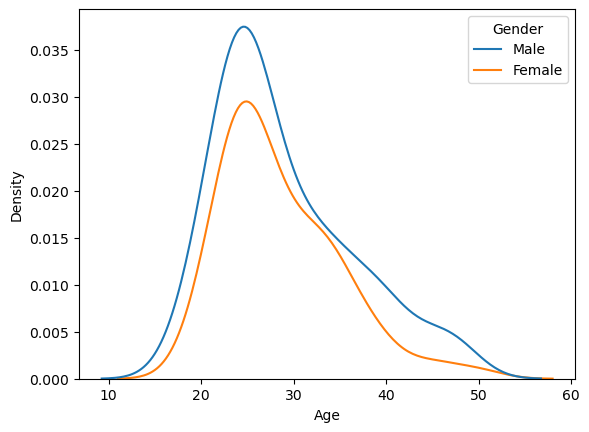

In [71]:
# Gender & Product
sns.kdeplot(data=ds, x='Age', hue='Gender')
plt.show()

<h4>Observations

Most of the costumers are in the same range of 20-32.

As we have seen in pie chart . most of the costumers are men

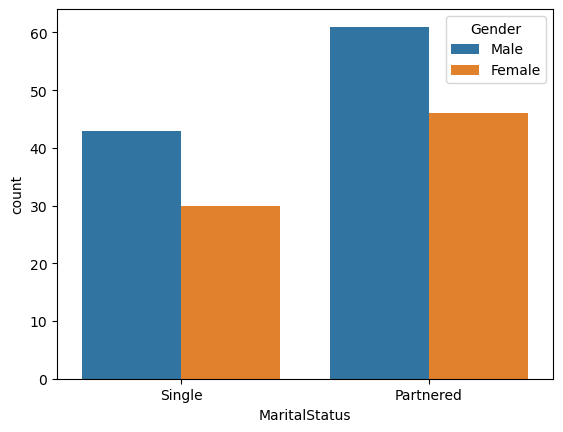

In [76]:
#MaritalStatus & Gender
sns.countplot(data=ds, x='MaritalStatus', hue='Gender')
plt.show()

<h4>Observations

Irrespective of Martial Status, Men are the most frequent buyer of the treadmill.

Partnered female are more frequent buyers compare to Single females.

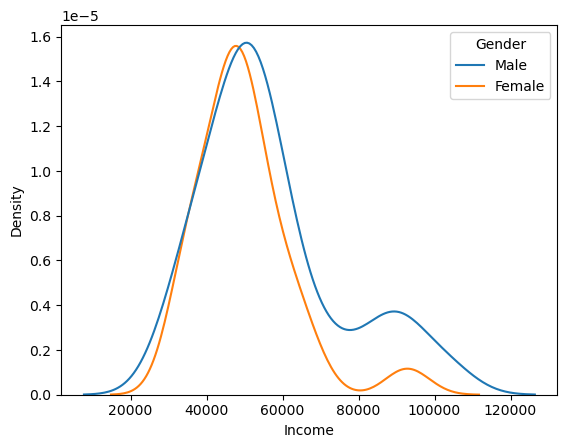

In [87]:
sns.kdeplot(data=ds, x='Income', hue='Gender')
plt.show()

<h4>Observations

Peak income of both gender are roughly same between 30K-65K.

Majority of the males have annual salary more than 75K, while few female have the same.

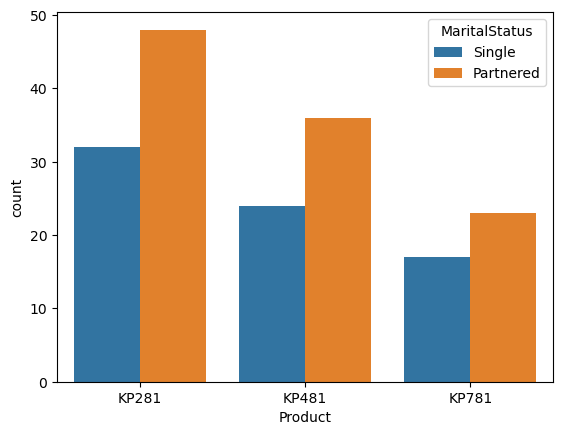

In [88]:
# Product & MaritalStatus
sns.countplot(data=ds, x="Product", hue='MaritalStatus')
plt.show()

<h4>Observations

KP281 is most preferred by both Single and Couples.while KP781 is less preferred by both.
    
In all of the products couples are major costumers of treadmill.

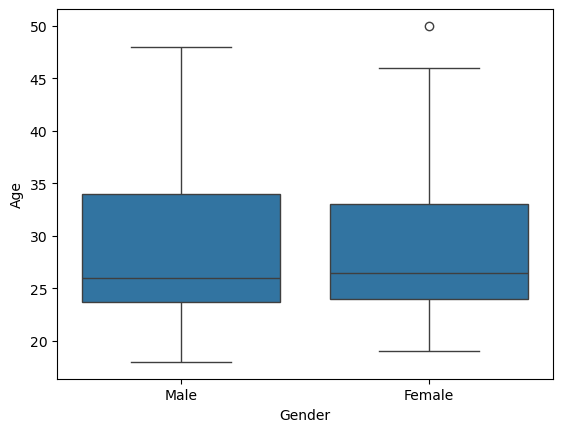

In [89]:
sns.boxplot(x="Gender", y="Age", data=ds)
plt.show()

<h4>Observations

Majority of age in both Gender lies approx between 33-47.

There is one outlier detected in female which age's 50.

<h1>Probablilty

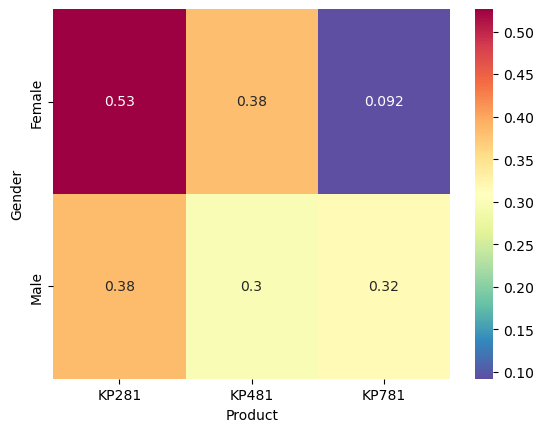

In [34]:
sns.heatmap(pd.crosstab(ds['Gender'], ds['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

<h3>P(Product|Gender)

Probability of buying KP281 given that the customer is male, P(Product=KP281 | Customer=Male) = 0.38.

Probability of buying KP481 given that the customer is male, P(Product=KP481 | Customer=Male) = 0.3.

Probability of buying KP781 given that the customer is male, P(Product=KP781 | Customer=Male) = 0.32.

Probability of buying KP281 given that the customer is female, P(Product=KP281 | Customer=Female) = 0.53.

Probability of buying KP481 given that the customer is female, P(Product=KP481 | Customer=Female) = 0.38.

Probability of buying KP781 given that the customer is female, P(Product=KP781 | Customer=Female) = 0.092.

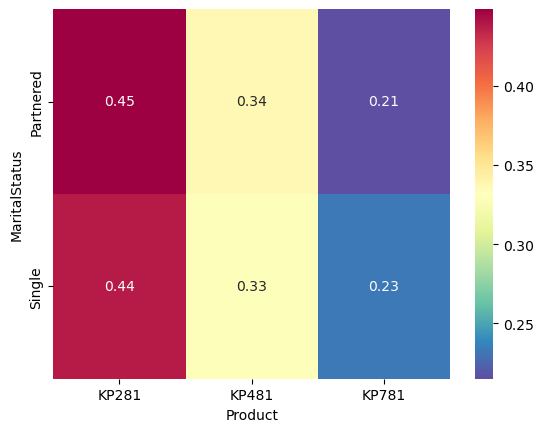

In [36]:
sns.heatmap(pd.crosstab(ds['MaritalStatus'],ds['Product'], normalize='index'), annot=True, cmap='Spectral_r')
plt.show()

<h4>P(Product|Marital Status)

Probability of buying KP281 given that the marital status is single, P(Product=KP281 | MaritalStatus=Single) = 0.44.

Probability of buying KP481 given that the marital status is single, P(Product=KP481 | MaritalStatus=Single) = 0.33.

Probability of buying KP781 given that the marital status is single, P(Product=781 | MaritalStatus=Single) = 0.23.

Probability of buying KP281 given that the marital status is partnered, P(Product=KP281 | MaritalStatus=Single) = 0.45.

Probability of buying KP481 given that the cmarital status is partnered, P(Product=KP481 | MaritalStatus=Single) = 0.34.

Probability of buying KP781 given that the marital status is partnered, P(Product=KP781 | MaritalStatus=Single) = 0.21.

<h3>Marginal Probability P(Product)

In [38]:
ds['Product'].value_counts(normalize=True)

Product
KP281    0.444444
KP481    0.333333
KP781    0.222222
Name: proportion, dtype: float64

Probability of buying KP281 treadmill, P(Product=KP281) = 0.44.

Probability of buying KP481 treadmill, P(Product=KP481) = 0.33.

Probability of buying KP781 treadmill, P(Product=KP781) = 0.22.

<h1>Business Insights:

1. The top three purchased treadmill models are KP281, KP481, and KP781, in that order.

2. There is a higher proportion of male buyers compared to female buyers.

3. More customers are in a partnered marital status compared to single.

4. The average age of customers is 28, with a range between 18 to 50 years and a median of 26 years.

5. The average self-fitness rating of customers is 3, with a range between 1 to 5 and a median of 3.

6. Customers' average annual income is 53.7K, with a range between 29.5K to 104K and a median income of 50.5K.

7. There is a moderately strong relationship between education and income.

8. The relationship between fitness and distance traveled on the treadmill is strong.

9. Similarly, there is a strong relationship between usage frequency and distance traveled on the treadmill.

10. The age difference between the 25th and 75th percentile is nine years, indicating a relatively narrow age spread among customers.

11. The mean income for KP281 buyers is 46.4K , for KP481 buyers is 48.9K , and for KP781 buyers is 75.4K.

12. KP781 is the more preferred treadmill among male customers, while females show the least preference for it.

13. Overall, male customers tend to use treadmills more frequently than females.

14. The income distribution between both genders is roughly similar.

15. Partnered customers tend to have a higher fitness level compared to singles.

<h1>Recommendations

1. Promote KP281 and KP481 treadmills as budget-friendly options, especially targeting customers with annual incomes in the range of 39K - 53K Dollars.

2. Market KP781 treadmill as a premium product with advanced features, targeting professionals and athletes.

3. Enhance the marketing strategy for KP781 by associating it with renowned athletes like Neeraj Chopra, leveraging their achievements for better outreach.

4. Run market campaigns on special day for targeting overweight people. 

5. Run special marketing campaigns on Women's Day and Mother's Day to encourage more women to adopt an exercise routine, highlighting the benefits of using our treadmills.

6. Conduct research to expand the customer base beyond 50 years of age. Offer basic treadmill models (KP281/KP481) as suitable options for beginners in this age group.

7. Encourage existing customers to upgrade their treadmills to high-end models as their usage increases over time, leading to increased revenue for the business.